<a href="https://www.kaggle.com/shivavashishtha/l10-detection-of-missing-values?scriptVersionId=89751537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-ipl-auction-dataset/ipl_2022_dataset.csv
/kaggle/input/shark-tank-india-dataset/Shark Tank India Dataset.csv


# Reading the 2022 IPL Auction Data

In [2]:
df=pd.read_csv("../input/2022-ipl-auction-dataset/ipl_2022_dataset.csv",index_col="Unnamed: 0")

# Checking the head()

In [3]:
df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


# Checking the tail()

In [4]:
df.tail()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
632,Aaron Hardie,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold


# Checking the info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 39.6+ KB


# Checking the null values in Player series using isnull()/isna()

In [6]:
df.Player.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
628    False
629    False
630    False
631    False
632    False
Name: Player, Length: 633, dtype: bool

In [7]:
df.isna()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
628,False,False,False,True,True,True,False
629,False,False,False,True,True,True,False
630,False,False,False,True,True,True,False
631,False,False,False,True,True,True,False


# Summing up the null values in a dataframe

In [8]:
df.isna().sum(axis=0)

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

# Checking if their is any null value using isna().any()

In [9]:
df.isna().any(axis=0)

Player             False
Base Price         False
TYPE               False
COST IN ₹ (CR.)     True
Cost IN $ (000)     True
2021 Squad          True
Team               False
dtype: bool

In [10]:
df.isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
628    3
629    3
630    3
631    3
632    3
Length: 633, dtype: int64

In [11]:
df.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
628     True
629     True
630     True
631     True
632     True
Length: 633, dtype: bool

In [12]:
df[df.isna().any(axis=1)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


# Producing a boolean dataframe using notna()

In [13]:
df.notna()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
628,True,True,True,False,False,False,True
629,True,True,True,False,False,False,True
630,True,True,True,False,False,False,True
631,True,True,True,False,False,False,True


In [14]:
df.notna()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
628,True,True,True,False,False,False,True
629,True,True,True,False,False,False,True
630,True,True,True,False,False,False,True
631,True,True,True,False,False,False,True


# Using notna() on a specific column

In [15]:
df["2021 Squad"].notna()

0       True
1       True
2       True
3       True
4       True
       ...  
628    False
629    False
630    False
631    False
632    False
Name: 2021 Squad, Length: 633, dtype: bool

# Producing dataframe which contains nol null values in a specific column

In [16]:
df[df["COST IN ₹ (CR.)"].notna()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
232,Priyam Garg,20 Lakh,BATTER,0.2,26.0,SRH,Sunrisers Hyderabad
233,R Samarth,20 Lakh,BATTER,0.2,26.0,NaN,Sunrisers Hyderabad
234,Jagadeesha Suchith,20 Lakh,BOWLER,0.2,26.0,SRH,Sunrisers Hyderabad
235,Shashank Singh,20 Lakh,ALL-ROUNDER,0.2,26.0,NaN,Sunrisers Hyderabad


# Summing up the not null values of each column in a dataframe

In [17]:
df.notna().sum()

Player             633
Base Price         633
TYPE               633
COST IN ₹ (CR.)    237
Cost IN $ (000)    237
2021 Squad         199
Team               633
dtype: int64

# Checking if all the values are null or not null in a dataframe

In [18]:
df.isna().all()

Player             False
Base Price         False
TYPE               False
COST IN ₹ (CR.)    False
Cost IN $ (000)    False
2021 Squad         False
Team               False
dtype: bool

In [19]:
df.notna().all()

Player              True
Base Price          True
TYPE                True
COST IN ₹ (CR.)    False
Cost IN $ (000)    False
2021 Squad         False
Team                True
dtype: bool

# Producing a heatmap of not null values

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

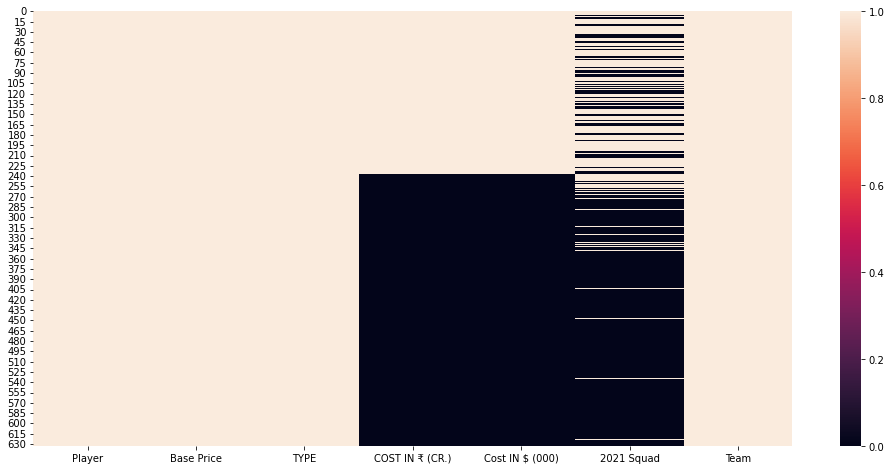

In [21]:
plt.figure(figsize=(17,8))
sns.heatmap(df.notna())
plt.show()

# Checking the value counts of each column

In [22]:
df["2021 Squad"].value_counts(dropna=False)

NaN     434
SRH      26
MI       26
KKR      25
RR       25
CSK      25
DC       25
PBKS     24
RCB      23
Name: 2021 Squad, dtype: int64

In [23]:
df["2021 Squad"].replace(to_replace="RCB",value="missing data",inplace=True)

In [24]:
df["2021 Squad"].replace(to_replace="MI",value="-",inplace=True)

In [25]:
df["2021 Squad"].replace(to_replace="DC",value="0",inplace=True)

In [26]:
df["2021 Squad"].value_counts(dropna=False)

NaN             434
SRH              26
-                26
KKR              25
RR               25
CSK              25
0                25
PBKS             24
missing data     23
Name: 2021 Squad, dtype: int64

# Replacing unrealistic data to null values

In [27]:
df["2021 Squad"].replace(to_replace=["RCB","-","0"],value="missing data",inplace=True)

In [28]:
df["2021 Squad"].value_counts(dropna=False)

NaN             434
missing data     74
SRH              26
KKR              25
RR               25
CSK              25
PBKS             24
Name: 2021 Squad, dtype: int64

# Conclusion 
These are the different ways to detect the null values in dataframes and series